## Devanshi Patel

### Importing libraries

In [1]:
# For mathematical operations
import numpy as np

# For data analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

### Loading the dataset

In [2]:
# Load train data
df = pd.read_csv('tech_team_train.csv')

# Load test data
test_data = pd.read_csv('tech_team_test.csv')

In [3]:
# Reading the first 8 values from dataset

df.head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35


In [4]:
# Read last 5 values from dataset

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35
199999,13431,930,1128,12,2011-10-05 15:52:00,0.42,12723.0,13


In [5]:
# Find shape of dataframe

df.shape

(200000, 8)

<b>The dataset has 200000 records and 8 columns.</b>

In [6]:
# Reordering the columns by moving the UnitPrice column to extreme right

df = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'CustomerID', 'Country', 'UnitPrice']]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,UnitPrice
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,3.75
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,1.95
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,5.95
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,1.65


In [7]:
# Find datatype of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  int64  
 1   StockCode    200000 non-null  int64  
 2   Description  200000 non-null  int64  
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   CustomerID   200000 non-null  float64
 6   Country      200000 non-null  int64  
 7   UnitPrice    200000 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 12.2+ MB


<b>There are 5 integer, 2 float and 1 object columns.</b>

In [8]:
# Change datatype of 'InvoiceDate' column to datetime variable

df['InvoiceDate']=pd.to_datetime((df['InvoiceDate']))
df["InvoiceDate"].dtype

dtype('<M8[ns]')

In [9]:
# Check if any duplicate records are present

duplicate=df[df.duplicated()] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,UnitPrice
10046,17505,2388,3587,1,2011-11-28 14:30:00,13030.0,35,2.08
10509,15113,2175,100,5,2011-11-01 10:16:00,17377.0,35,0.83
10652,3421,2546,216,3,2011-03-01 13:51:00,15456.0,35,0.21
11965,11965,3108,195,6,2011-09-11 14:51:00,13611.0,35,1.25
13108,14321,2091,3029,1,2011-10-19 13:58:00,14704.0,35,1.25
...,...,...,...,...,...,...,...,...
199887,15995,1478,3473,1,2011-11-11 10:41:00,17841.0,35,1.65
199920,15155,815,1450,12,2011-11-01 14:29:00,16729.0,35,0.79
199931,8447,925,2099,1,2011-06-22 13:28:00,17585.0,35,1.25
199950,17161,2677,3163,1,2011-11-23 15:53:00,17290.0,35,2.10


<b>There are 1333 duplicate records in the dataset.</b>

In [10]:
# Remove duplicate records except the first occurence

df.drop_duplicates(inplace=True)

In [11]:
# Again check if any duplicate records are left

duplicate = df[df.duplicated()] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,UnitPrice


<b>Hence, all duplicate records are removed.</b>

Text(0, 0.5, 'UnitPrice')

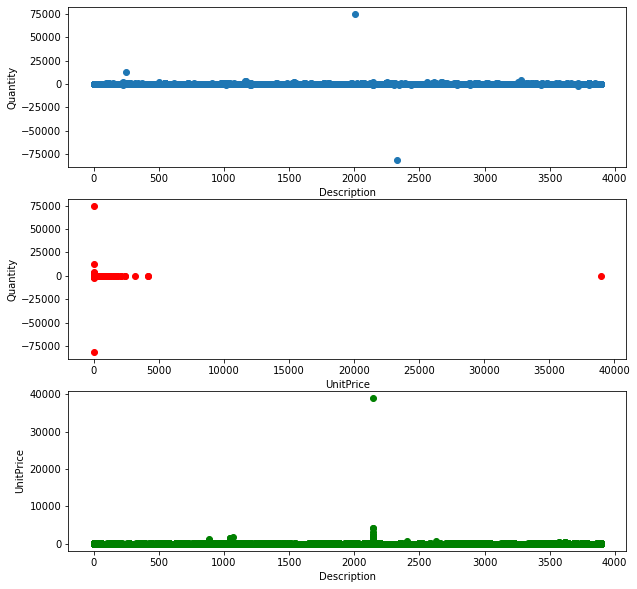

In [12]:
# Detect outliers

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

ax[0].scatter(df['Description'], df['Quantity'])
ax[0].set_xlabel('Description')
ax[0].set_ylabel('Quantity')

ax[1].scatter(df['UnitPrice'], df['Quantity'], c='r')
ax[1].set_xlabel('UnitPrice')
ax[1].set_ylabel('Quantity')

ax[2].scatter(df['Description'], df['UnitPrice'], c='g')
ax[2].set_xlabel('Description')
ax[2].set_ylabel('UnitPrice')


<b>From the visualization, we observe that outliers are present in the dataset.</b>

In [13]:
# Handle outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

InvoiceNo      9574.0
StockCode      1169.0
Description    1807.0
Quantity         10.0
CustomerID     2852.0
Country           0.0
UnitPrice         2.5
dtype: float64


In [14]:
# Tried removing outliers but getting an error
# Remove outliers

# df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_out.shape

In [15]:
# Find the total number of missing values in each column

print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
UnitPrice      0
dtype: int64


<b>There are no missing records present.</b>

In [16]:
# Checking the shape again

df.shape

(198667, 8)

<b>After removing duplicate values and checking for missing values there are 198667 records in dataset.</b>

### Exploratory Data Analysis

In [17]:
# Find negative values in Quantity 

columns = ['StockCode', 'Quantity', 'UnitPrice']
df.loc[df["Quantity"] < 0][columns]

,StockCode,Quantity,UnitPrice
20,3131,-36,1.06
152,2224,-1,4.95
157,1521,-6,2.95
186,2166,-100,1.79
196,1014,-17,4.25
...,...,...,...
199532,1283,-1,8.25
199587,3198,-2,7.95
199834,1646,-2,9.95
199870,3207,-1,2.10


<b>There are 4310 records having negative quantity values. The negative values indicate that the products were returned.</b>

In [18]:
# Find negative values in UnitPrice

df.loc[df["UnitPrice"] < 0][columns]

,StockCode,Quantity,UnitPrice


<b>No negative records are present in UnitPrice.</b>

In [19]:
# Display the column names and give its description

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'CustomerID', 'Country', 'UnitPrice'],
      dtype='object')

<b>The 8 columns are:-</b>

<ol>
    <li>Invoice No - Invoice ID, encoded as Label</li>
    <li>StockCode - Unique code per stock, encoded as Label</li>
    <li>Description - The Description, encoded as Label</li>
    <li>Quantity - Quantity purchased</li>
    <li>InvoiceDate - Date of purchase</li>
    <li>UnitPrice - The target value, price of every product</li>
    <li>CustomerID - Unique Identifier for every Customer</li>
    <li>Country - Country of sales, encoded as Label</li>
</ol>

In [20]:
# Calculate the total amount spent of each transaction by multiplying "Quantity" by "UnitPrice"

df['TotalAmount'] = (df['Quantity'])*(df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,UnitPrice,TotalAmount
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,3.75,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,1.95,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,5.95,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,0.83,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,1.65,19.80


<b>TotalAmount column is added in the dataset.</b>

In [21]:
# Group data by CustomerID and count the unique InvoiceNo to see the orders placed by the customers

order_by_each_customer = df.groupby('CustomerID')['InvoiceNo'].count()
order_by_each_customer

CustomerID
12346.0      1
12347.0     84
12348.0     13
12349.0     39
12350.0      9
          ... 
18280.0      4
18281.0      4
18282.0      3
18283.0    362
18287.0     40
Name: InvoiceNo, Length: 4297, dtype: int64

<b>Order placed by each customer is displayed.</b>

In [22]:
# Display top 10 customers with highest number of orders

order_by_each_customer.nlargest(10)

CustomerID
17841.0    3883
14911.0    2896
14096.0    2518
12748.0    2197
14606.0    1357
15311.0    1199
14646.0    1026
13089.0     919
13263.0     837
14298.0     811
Name: InvoiceNo, dtype: int64

<b>CustomerID of the customers with highest number of orders is displayed.
The customers  </b>

In [23]:
# Group by CustomerID and calculate its average unit price

cust_mean = df.groupby('CustomerID')['UnitPrice'].mean()
cust_mean.nlargest(10)

CustomerID
15098.0    9907.350000
15802.0     451.420000
13452.0     295.000000
17940.0     221.062222
15299.0     130.484000
12744.0     119.604423
17603.0     104.466364
12881.0     100.675000
16692.0      78.725000
13145.0      76.015000
Name: UnitPrice, dtype: float64

<b>Customer with the above IDs buy expensive items.</b>

In [24]:
order_by_each_customer.equals(other=cust_mean)

False

<b>From the above two analysis we observe that the customer who buys more items need not but expensive items. </b>

In [25]:
# Find number of days the person has been a customer

# group by customerID and select the date at which the first order was placed
days= df.groupby('CustomerID', as_index=False)['InvoiceDate'].min()

# edit names of columns 
days.columns = ['CustomerID', 'Earliest_Invoice']

# create a column with the date of the latest order placed
days['Latest_Invoice'] = pd.to_datetime((df['InvoiceDate']).max())
days.set_index('CustomerID')

#calculate how many days the person has been a customer
days['days_as_customer'] = 1 + (days.Latest_Invoice-days.Earliest_Invoice).astype('timedelta64[D]')

#delete earliest invoice and laterst invoice columns
days.drop(['Earliest_Invoice', 'Latest_Invoice'], axis=1, inplace=True)

# Display top 15 customers
days.nlargest(15, columns='days_as_customer')

,CustomerID,days_as_customer
69,12431.0,374.0
189,12583.0,374.0
328,12748.0,374.0
357,12791.0,374.0
390,12838.0,374.0
412,12868.0,374.0
535,13047.0,374.0
682,13255.0,374.0
790,13408.0,374.0
815,13448.0,374.0


<b>There are many customers who have ordered for more than a year.</b>

In [26]:
# Group by Country to find the number of orders in each Country

cust_freq = df.groupby('Country')["InvoiceNo"].count()
cust_freq

Country
0        619
1        217
2          7
3       1007
4         13
5         73
6        350
7        293
8         21
9        211
10      3629
11        28
12       332
13      4194
14      4727
15        71
16        84
17       128
18       394
19       160
20        25
21        15
22        60
23      1165
24       537
25       157
26       753
27        32
28         4
29       104
30      1255
31       213
32       887
33       135
34        33
35    176604
36       130
Name: InvoiceNo, dtype: int64

<b>Inferences:-</b>

<ul>
    <li>Country with label 35 has the highest number of orders.</li>
    <li>Country with labels 14, 13, 10, 3, 23, 30 also have pretty good orders.</li>
    <li>There are 13 countries with orders less than 100.</li>
</ul>

In [27]:
# Find which hours are the busiest

# getting hour from InvoiceDate
hours = df['InvoiceDate'].dt.hour

Hours, count = np.unique(hours, return_counts=True)

for i in zip(Hours, count):
    print(i)

(6, 23)
(7, 198)
(8, 4417)
(9, 11139)
(10, 19179)
(11, 24492)
(12, 35749)
(13, 31818)
(14, 26658)
(15, 22350)
(16, 12212)
(17, 6713)
(18, 1548)
(19, 1744)
(20, 427)


<b>Inferences:-</b>

<ul>
    <li>The most busiest hour is from 9AM to 4PM.</li>
    <li>The time between 8AM to 9AM and 4PM to 6PM also has significant number of orders.</li>
    <li>There are no orders between 9PM to 6AM.</li>
</ul>

In [28]:
# Find most sales occur in which week

# getting weekday
weekday = df['InvoiceDate'].dt.weekday

df.groupby(weekday)["InvoiceNo"].count()

InvoiceDate
0    32371
1    33248
2    34628
3    40305
4    27530
6    30585
Name: InvoiceNo, dtype: int64

<b>Inferences:-</b>

<ul>
    <li>Thursday has maximum orders.</li>
    <li>Other days of the week also have high number of orders.</li>
    <li>Friday has slighty less orders.</li>
    <li>There are no orders on Saturday so we can assume that the company doesn't accept orders on Saturday.</li>
</ul>


In [29]:
# Product which brings most revenue

most_revenue = df.groupby('StockCode')['UnitPrice'].max()
most_revenue.sort_values(ascending=False)

StockCode
3681    38970.000
3679     1867.860
3680     1599.260
3678     1100.440
3683      700.000
          ...    
26          0.120
33          0.120
89          0.100
44          0.100
3682        0.001
Name: UnitPrice, Length: 3544, dtype: float64

<b>Inferences:-</b>

<ul>
    <li>Product with label 3681 brings the most revenue.</li>
    <li>Other products with label 3679, 3680, 3678 also bring good revenue.</li>
    <li>Products with label 26, 33, 89, 44 and 3682 bring minimum revenue.</li>
</ul>

In [30]:
# Product which is bought maximum

max_product = df.groupby('StockCode')["Quantity"].count()
max_product.sort_values(ascending=False)

StockCode
3249    1016
1292     874
3235     845
3069     709
170      687
        ... 
2432       1
3340       1
3341       1
3538       1
3524       1
Name: Quantity, Length: 3544, dtype: int64

<b>Inferences:-</b>

<ul>
    <li>Product with label 3249 has the maximum count which means that it is in high demand.</li>
    <li>There are some products with count as 1 indicating that it is not used much.</li>
</ul>

### Data Visualization

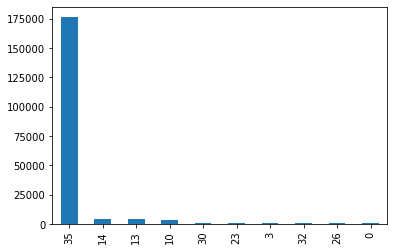

In [31]:
# Top 10 countries sales count wise in the cleaned up data

df['Country'].value_counts().head(10).plot(kind='bar')

<b>Observations:-</b>

<ul>
    <li>Country with label 35 has highest orders.</li>
    <li>Other countries with labels 14, 13, 10 have less orders if compared with label 35 but more than other countries.</li>
</ul>

<ipython-input-32-83eda241d8b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_qty["TotalAmount"] = abs(neg_qty["TotalAmount"])


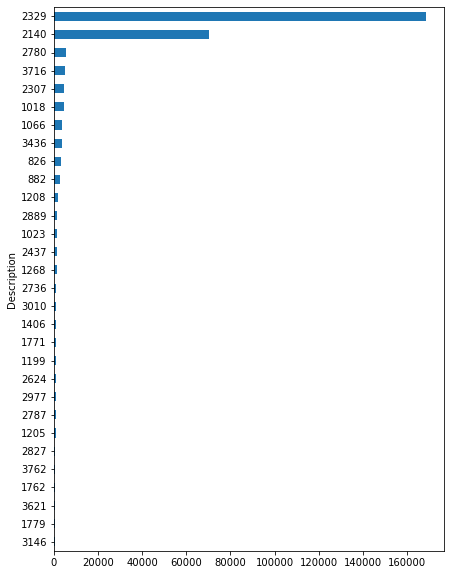

In [32]:
# Find the Product which has more contribution to negative quantity values

fig, ax = plt.subplots(figsize=(7,10))

neg_qty = df[df["Quantity"]<0]
neg_qty["TotalAmount"] = abs(neg_qty["TotalAmount"])

x = neg_qty[["Description","TotalAmount"]]
x.groupby("Description")["TotalAmount"].sum().sort_values(ascending=True).tail(30).plot.barh(ax=ax)

<b>Observation:-</b>

<ul>
    <li>Product with label 2329 and 2140 have major contribution to negative values.</li>
    <li>Product labels 2780, 3716, 2307, 1018, 1066, 3436, 826 and 1208 also have significant contribution.</li>
    <li>These returns may be due to defect in the product, late delivery by the company or some other reason.</li>
</ul>
 

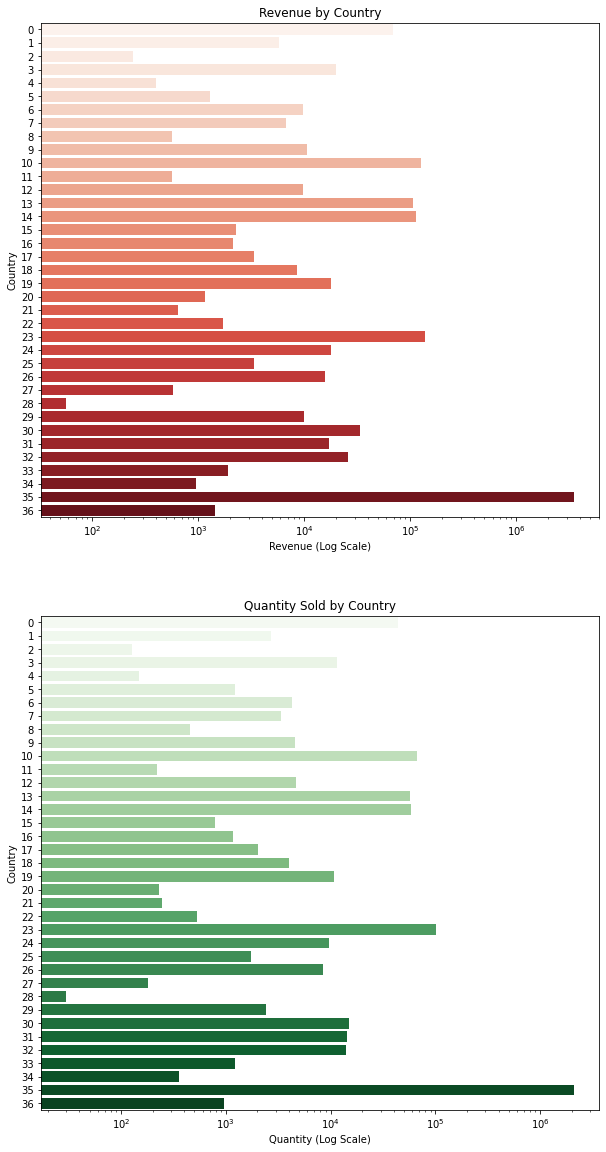

In [33]:
# Revenue and Quantity sold country wise

reg = df[df['TotalAmount']>=0].groupby('Country').agg({'TotalAmount':'sum',
                                                  'Quantity': 'sum'})


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,20))

g1 = sns.barplot(x=reg['TotalAmount'], y=reg.index, alpha=1, ax=ax[0],palette='Reds', orient='h')
g2 = sns.barplot(x=reg['Quantity'], y=reg.index, alpha=1, ax=ax[1], palette='Greens',orient='h')

ax[1].title.set_text('Quantity Sold by Country')
ax[1].set_xlabel("Quantity (Log Scale)")

ax[0].title.set_text('Revenue by Country')
ax[0].set_xlabel("Revenue (Log Scale)")

g1.set_xscale("log")
g2.set_xscale("log")

<b>Observation:-</b>

<ul>
    <li>Country with label 35 has maximum revenue and sales.</li>
    <li>Other countries with labels 23, 10, 14, 13 also have good sales and revenue.</li>
    <li>It can be assumed that the company is located in Country 35 as it performs very well there.</li>
    <li>It can also be assumed that the company doesn't perform very well internationally as it's revenue and sales are quite low in many countries.</li>
</ul>

<ipython-input-34-669a92f759c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev['Transactions Count'] = 1


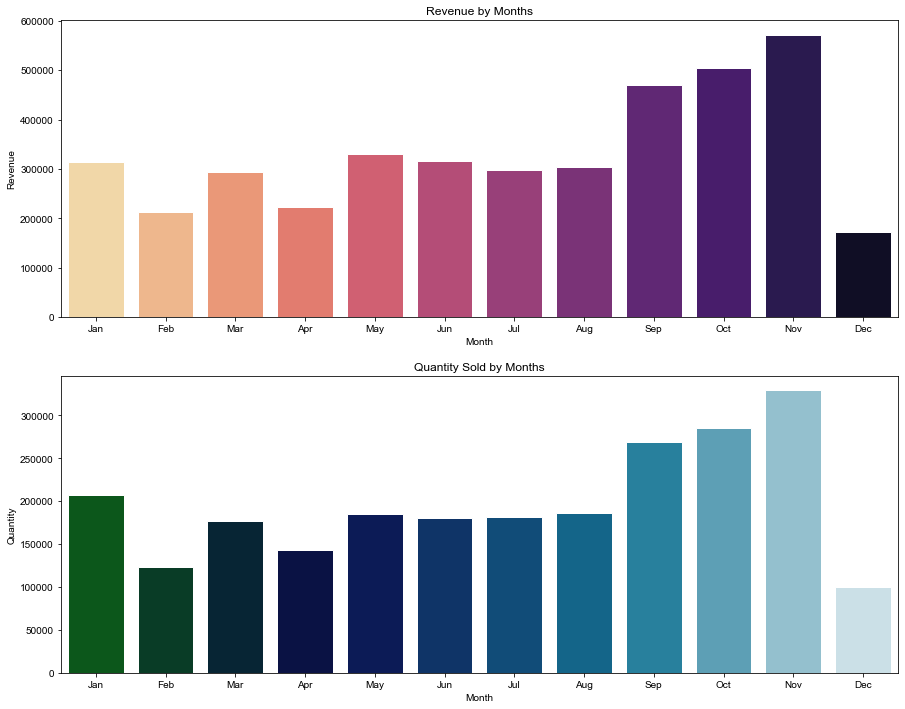

In [34]:
# Revenue and Sales by Month

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,12))

rev = df[(df['TotalAmount']>0)&(df['InvoiceDate'].dt.year==2011)]
rev['Transactions Count'] = 1
rev = rev.groupby(rev['InvoiceDate'].dt.month).agg({'TotalAmount':'sum',
                                                  'Quantity': 'sum'})
rev = rev.reset_index()
rev['Month'] = rev['InvoiceDate'].apply(lambda x: calendar.month_abbr[x])
rev = rev.rename({'TotalAmount':'Revenue'},axis=1)

sns.set_style("whitegrid")
sns.barplot(data=rev, x=rev.Month, y='Revenue', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue by Months')

sns.barplot(data=rev, x=rev.Month, y='Quantity',  palette='ocean', ax=ax[1])
ax[1].title.set_text('Quantity Sold by Months')

<b>Observation:-</b>

<ul>
    <li>The revenue and sales are highest in the month of November.</li>
    <li>September and October also have impressive revenue and sales.</li>
    <li>Other months have good revenue and sales while December has the lowest revenue and sales.</li>
</ul>

In [35]:
# PLot Correlation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,UnitPrice,TotalAmount
InvoiceNo,1.00,0.09,0.03,-0.01,-0.01,0.00,0.01,-0.01
StockCode,0.09,1.00,-0.01,-0.00,0.00,0.01,0.02,0.00
Description,0.03,-0.01,1.00,-0.00,-0.00,-0.01,-0.00,-0.00
Quantity,-0.01,-0.00,-0.00,1.00,-0.01,-0.01,-0.00,0.92
CustomerID,-0.01,0.00,-0.00,-0.01,1.00,0.39,-0.00,-0.01
Country,0.00,0.01,-0.01,-0.01,0.39,1.00,-0.00,-0.01
UnitPrice,0.01,0.02,-0.00,-0.00,-0.00,-0.00,1.00,-0.20
TotalAmount,-0.01,0.00,-0.00,0.92,-0.01,-0.01,-0.20,1.00


<b>Observation:-</b>

<ul>
    <li>There is almost no relation between any attributes except for one.</li>
    <li>There is a Positive relation of 0.92 between Quantity and TotalAmount attributes. It indicates that when customer buys more products their total amount inreases.</li>
</ul>

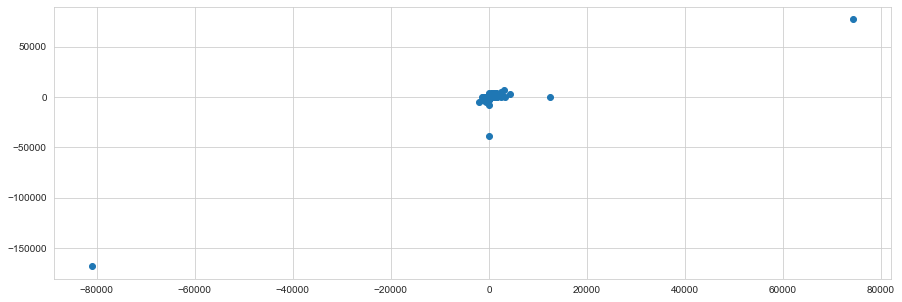

In [36]:
# Plotting the relation using scatter plot

plt.figure(figsize=(15, 5))
plt.scatter(df['Quantity'], df['TotalAmount'])

<b>Recommendations from Exploratory Data Analysis:-</b>
<ul>
    <li>Providing bonus prizes or giving rewards to the customers with highest number of purchases.</li>
    <li>Trying not to deliver damaged goods to the customers as it leads to returns.</li>
    <li>Conducting annual sales and giving holiday discounts to customers to increase its revenue.</li>
    <li>Increase the stock of products which are in demand.</li>
    <li>As Thursday is the busiest weekday the company can increase its staff so that it has maximum sales.</li>
</ul>

### Model

In [37]:
# convert datatype of InvoiceDate in DataFrame
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)
df['InvoiceDate']=df['InvoiceDate'].apply(lambda x: x.toordinal())

# Independent variable
X_train = df.iloc[:, 0:7]

# Depedent variable
y_train = df.iloc[:, -1]

In [38]:
X_test = test_data

# convert datatype of InvoiceDate in X_test
X_test['InvoiceDate'] = pd.to_datetime(X_test['InvoiceDate'],infer_datetime_format=True)
X_test['InvoiceDate']=X_test['InvoiceDate'].apply(lambda x: x.toordinal())

In [39]:
# Shape of train and test dataset

print(X_train.shape, X_test.shape, y_train.shape)

(198667, 7) (84780, 7) (198667,)


In [40]:
# Implement Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [41]:
# Regression Coefficient

print("intercept:", lin_reg.intercept_)
print("coef_:", lin_reg.coef_)

intercept: -71734.62705636238
coef_: [-2.15184012e-03  1.56878756e-03 -1.38819031e-04  1.57239466e+00
  9.77114009e-02  5.52855602e-04 -1.84860027e-01]


In [42]:
# Predict values
y_pred = lin_reg.predict(X_test)
y_pred

array([ 0.96978011,  4.14525379, 37.92769162, ...,  6.44513027,
       76.20649585,  8.35127989])